In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("../datasets/Social_Network_Ads.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


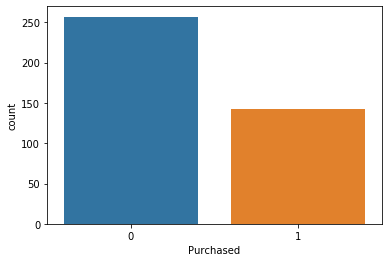

In [3]:
sns.countplot("Purchased",data=df)
plt.show()

In [6]:
df['Purchased'].nunique()

2

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
df.columns.tolist()

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [16]:
X=df[['Gender', 'Age', 'EstimatedSalary']]

In [30]:
gen_enc=LabelEncoder()
X['Gender']=gen_enc.fit_transform(X['Gender'])

In [31]:
scaled = StandardScaler()
x = scaled.fit_transform(X)

In [32]:
y = df['Purchased']

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=0)
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest) * 100

92.5

In [34]:
ypred=model.predict(xtrain)
confusion_matrix(ytrain,ypred)

array([[181,  18],
       [ 37,  84]], dtype=int64)

In [35]:
(181+84)/(181+18+37+84)

0.828125

# Precision & Recall
    -precision tells us how many correct prediction cases actually turned out to be positive
    -recall tell how many actual positive cases we were able to predict correct with out model

In [37]:
# Precision
181/(181+18)

0.9095477386934674

In [38]:
# Recall
181/(181+39)

0.8227272727272728

In [39]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       199
           1       0.82      0.69      0.75       121

    accuracy                           0.83       320
   macro avg       0.83      0.80      0.81       320
weighted avg       0.83      0.83      0.82       320

